In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_excel('KPMG_clean_data.xlsx',sheet_name='CustomerDemographic')
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,Age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,1953-10-12,66.800276,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,39.603015,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,66.526303,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,58.819454,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,43.200276,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [10]:
df.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
Age                                     88
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [11]:
df = df.dropna(subset=['DOB'])
print(df.shape)
df = df[df['deceased_indicator']=='N']
print(df.shape)
df.isnull().sum()

(3913, 13)
(3911, 13)


customer_id                              0
first_name                               0
last_name                              121
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
Age                                      1
job_title                              497
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
dtype: int64

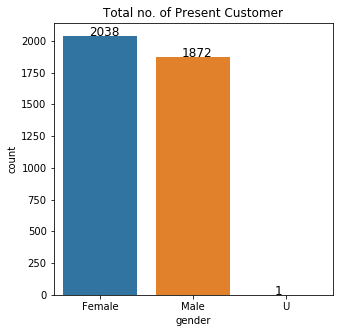

In [23]:
gender = df['gender'].value_counts()
f = gender[0]; m = gender[1]; u = gender[2]
gender=[f,m,u]
fig,ax = plt.subplots(figsize=(5,5))
sns.countplot(x='gender',data = df,ax=ax)
plt.title('Total no. of Present Customer')
for i in range(len(gender)):
    plt.text(x = i-0.12, y = gender[i]+0.6, s = gender[i], size = 12)
plt.show()

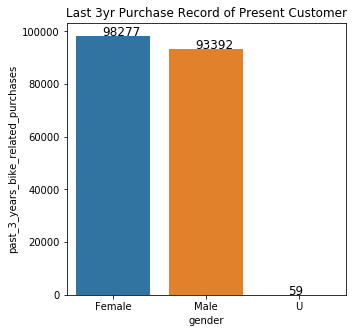

In [24]:
x = df.groupby('gender')['past_3_years_bike_related_purchases'].agg(sum)
x = x.reset_index()
val = x['past_3_years_bike_related_purchases']

fig,ax = plt.subplots(figsize=(5,5))
sns.barplot(x = 'gender', y='past_3_years_bike_related_purchases',data=x,ax=ax)
plt.title('Last 3yr Purchase Record of Present Customer')
for i in range(len(val)):
    plt.text(x = i-0.12, y = val[i]+0.7, s = val[i], size = 12)


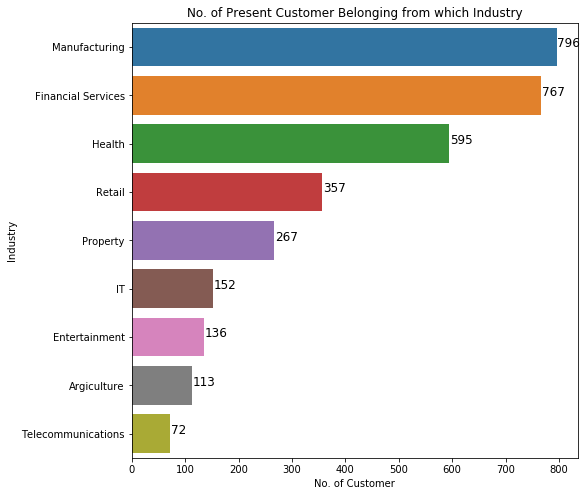

In [55]:
x = df['job_industry_category']
x = x.dropna()
x = x.value_counts()
x = x.reset_index()
val = x['job_industry_category']
fig,ax = plt.subplots(figsize=(8,8))
sns.barplot(x = 'job_industry_category', y='index',data=x,ax=ax)
plt.title('No. of Present Customer Belonging from which Industry')
plt.xlabel('No. of Customer')
plt.ylabel('Industry')
for i in range(len(val)):
    plt.text(x = val[i]+0.7, y = i, s = val[i], size = 12)

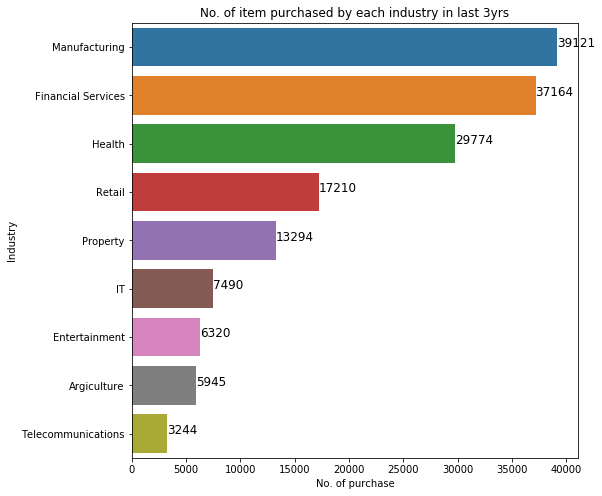

In [26]:
x = df[['past_3_years_bike_related_purchases', 'job_industry_category']]
x = x.dropna()
x = x.groupby('job_industry_category').agg(sum)
x = x.sort_values(by='past_3_years_bike_related_purchases',ascending=False)
x = x.reset_index()
val = x['past_3_years_bike_related_purchases']
fig,ax = plt.subplots(figsize=(8,8))
sns.barplot(x = 'past_3_years_bike_related_purchases', y='job_industry_category',data=x,ax=ax)
plt.title('No. of item purchased by each industry in last 3yrs')
plt.xlabel('No. of purchase')
plt.ylabel('Industry')
for i in range(len(val)):
    plt.text(x = val[i]+0.7, y = i, s = val[i], size = 12)

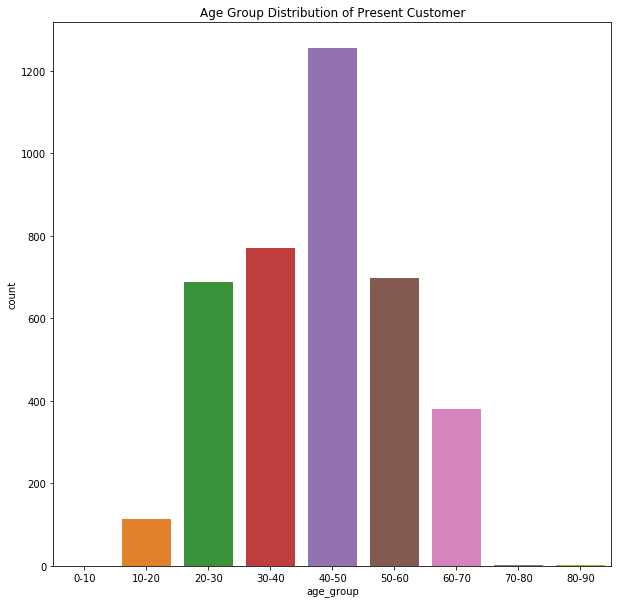

In [56]:
x = df[['Age']]
x = x.dropna()
x = x.astype(int)
x['age_group'] = pd.cut(x=x['Age'], bins=[0,10,20,30,40,50,60,70,80,90], labels=['0-10','10-20','20-30',\
                                                            '30-40','40-50','50-60','60-70','70-80','80-90'], right=True)

fig,ax=plt.subplots(figsize=(10,10))
sns.countplot(x ='age_group',data=x)
plt.title('Age Group Distribution of Present Customer')
plt.show()

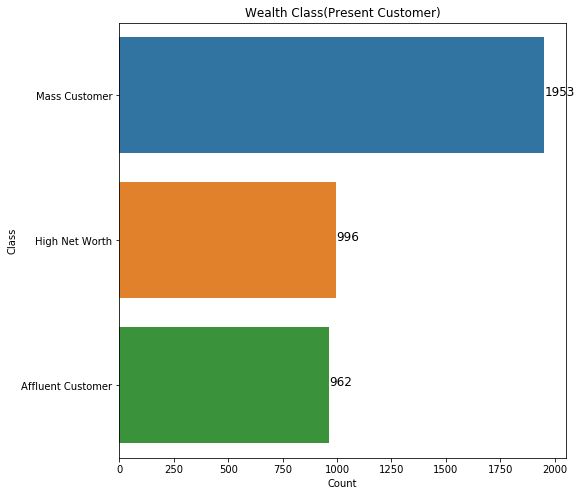

In [58]:
x = df['wealth_segment']
x = x.value_counts().reset_index()
val = x['wealth_segment']
fig,ax = plt.subplots(figsize=(8,8))
sns.barplot(x = 'wealth_segment', y='index',data=x,ax=ax)
plt.title('Wealth Class(Present Customer)')
plt.xlabel('Count')
plt.ylabel('Class')
for i in range(len(val)):
    plt.text(x = val[i]+0.7, y = i, s = val[i], size = 12)

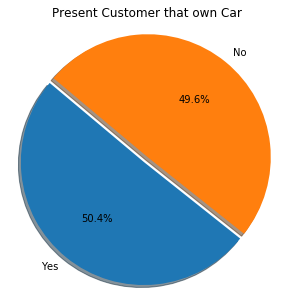

In [28]:
x = df['owns_car']
x = x.value_counts(normalize=True) * 100

explode = [0.0,0.05];labels = ['Yes','No']
fig,ax = plt.subplots(figsize=(5,5))
plt.pie(x, explode=explode, labels=labels,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Present Customer that own Car')
plt.show()